In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from scipy.stats import norm, multivariate_normal
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D


# Задания

## 1 Задание


Совместное распределение случайных величин  
X и Y является многомерным нормальным.  
Кроме того, известно, что:  
E(X) = 5, E(Y) = 2, Cov(X, Y) = 10,  
Var(X) = Var(Y) = 25.  
Рассчитайте:  

1) Corr(X, Y), E((X, Y)) и Cov((X, Y))  
2) P(X <= 7, Y <= 3)  
3) P(X <= 7, Y >= 3)  
4) P(X + 5Y <= 20)  
5) P(X + 5Y <= 20, X - Y <= 2)  
6) P(X - Y <= 2, 2X <= 15)  
7) P(X - Y >= 2, 2X <= 15)  
8) P(X <= 10, Y <= 5, X + Y <= 12)  

In [2]:
mu_X=5
mu_Y = 2
cov_XY = 10
var_X=25
var_Y=25
corr_XY= cov_XY / np.sqrt(var_X * var_Y))
mu= np.array([mu_X,mu_Y])
sigma = np.array([[var_X,cov_XY],
                  [cov_XY,var_Y]])

C:\Users\dbesp\AppData\Local\Temp/ipykernel_9696/300565433.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax= fig.gca(projection= '3d')


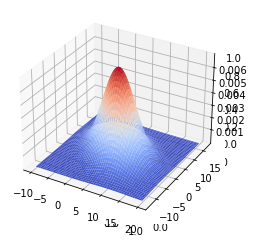

In [29]:

fig=plt.figure()
ax= fig.gca(projection= '3d')


x=np.linspace(mu_X-3*np.sqrt(var_X),mu_X+3*np.sqrt(var_X),100)
y=np.linspace(mu_Y-3*np.sqrt(var_Y),mu_Y+3*np.sqrt(var_Y),100)
X,Y = np.meshgrid(x,y)
pos = np.dstack((X,Y))


norm = multivariate_normal(mean=mu,cov=sigma) 
Z=norm.pdf(pos)

ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z,cmap = 'coolwarm')
plt.show()

In [6]:
print('Corr(X, Y) = ',corr_XY)
print('E((X, Y)) = ', mu)
sigma = np.array([[var_X,cov_XY],
                  [cov_XY,var_Y]])

print('P(X <= 7, Y <= 3) = ',multivariate_normal.cdf(x=[7,3],
                       mean = mu,
                       cov=sigma))

sigma_neg_Y= sigma = np.array([[var_X,-cov_XY],
                              [-cov_XY,var_Y]])


print('P(X <= 7, Y >= 3) = ', multivariate_normal.cdf(x=[7,3],
                       mean = [mu_X, -mu_Y],
                       cov=sigma_neg_Y))

Corr(X, Y) =  0.4
E((X, Y)) =  [5 2]
P(X <= 7, Y <= 3) =  0.4396171985932502
P(X <= 7, Y >= 3) =  0.5189118730732508


$P(X + 5Y <= 20)$  
$Z= X+5Y \sim N(E_X + 5 E_Y, D_X + 25 D_Y + 2*cov_{XY})$ 

In [7]:
print('P(X + 5Y <= 20) = ',norm.cdf(20, mu_X + 5*mu_Y , var_X + 25* var_Y+ 2*cov_XY ))

P(X + 5Y <= 20) =  0.502977153563214


In [8]:
A= np.array([[1,5],[1,-1]])
mu_new= np.matmul(A,mu)
sigma_new =  np.matmul(np.matmul(A,sigma), np.transpose(A))

print('P(X + 5Y <= 20, X - Y <= 2) = ',multivariate_normal.cdf(x=[20,2],
                       mean=mu_new,
                       cov=sigma_new))

P(X + 5Y <= 20, X - Y <= 2) =  0.14103047254384143


$P(X <= 10, Y <= 5, X + Y <= 12)$  
Проблема в том, что вектор $(X,Y,X+Y)$ не образует многомерного нормального распределения, посколькуматрица ковариаций - вырождена.  
Мы можем схитрить и добавить небольшую погрешность, тогда


In [10]:
eps = 1 #можно ли так схитрить?
sigma_3 = np.array([
                [var_X, cov_XY, var_X+cov_XY],
                [cov_XY, var_Y, cov_XY + var_Y],
                [ var_X+cov_XY, cov_XY + var_Y , var_X+var_Y+2*cov_XY +eps]
                ])
np.linalg.det(sigma_3)

print('P(X <= 10, Y <= 5, X + Y <= 12) = ',multivariate_normal.cdf(x=[10,5,12],
                       mean=[mu_X,mu_Y, mu_X+mu_Y],
                       cov=sigma_3))

P(X <= 10, Y <= 5, X + Y <= 12) =  0.6220183777119828


Видим, что добавление $\eps$ позволило нам посчитать такую веротность, причем можно заметить, что при изменении  $\eps$ вероятность остается устойчивой

## 2 задание

Для случайного вектора из предыдущего  
задания найдите:  
1)     E(X | Y = 1)  
2)     Var(X | Y = 1)  
3)     P(X <= 3 | Y = 1)  


In [11]:
def cond_mean(a, mean=np.array([0,0]), sigma=np.eye(2)):
    return mean[0] + np.sqrt(sigma[0][0] / sigma[1][1])*    \
                (a- mean[1]) * sigma[1][0]/( np.sqrt(sigma[0][0] * sigma[1][1]))

In [14]:
print('E(X | Y = 1) = ', cond_mean(1, [mu_X,mu_Y], sigma))

E(X | Y = 1) =  5.4


In [15]:
def cond_var(a, mean=np.array([0,0]), sigma=np.eye(2)):
    return( 1-  (sigma[1][0]/np.sqrt(sigma[0][0] * sigma[1][1]))**2)*sigma[0][0]

In [16]:
print('Var(X | Y = 1) = ',cond_var(1,[mu_X,mu_Y],sigma))

Var(X | Y = 1) =  21.0


In [25]:
def cond_prob(x, a, mean=np.array([0,0]), sigma=np.eye(2) ):
    mu=cond_mean(a,mean,sigma)
    var=cond_var(a,mean,sigma) 
    return norm.cdf(x,mu,var)

In [27]:
print('P(X <= 3 | Y = 1) = ', cond_prob(x=3,a=1,mean = [mu_X,mu_Y], sigma = sigma))

P(X <= 3 | Y = 1) =  0.4545056533230254
